<a href="https://colab.research.google.com/github/thivyaa-web-dev/Commannd_line_prompt/blob/master/sparks_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GRIP THE SPARKS FOUNDATION
TASK:1
NAME:THIVYAA

```



STEP1:iMPORTING THE DATASET

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)


In [5]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [7]:
# To find the number of columns and rows
df.shape


(25, 2)

In [8]:
# To find more information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
df.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
#We can check if our datasets contains null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

STEP-2 DATA VISUALISATION


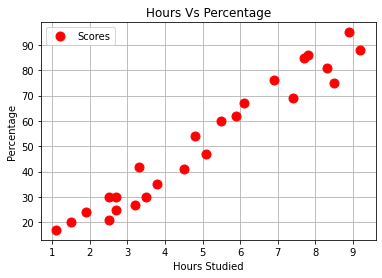

In [14]:
#Visulizing the dataset,we do this to find the relationship between two variables
df.plot(x='Hours',y='Scores',style='.',color ='red',markersize=18 )
plt.title("Hours Vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage")
plt.grid()
plt.show()

*Linear Regression**
Data Preparation
Splitting the data into training and testing data

In [16]:
# Using iloc we can divide the data
X= df.iloc[:,:1].values
Y= df.iloc[:,1:].values

In [17]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [18]:
Y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]])

In [22]:
from sklearn.model_selection import train_test_split 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,  
                                                     random_state = 50)

Training The Data


In [24]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression() 
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Visualising The Model


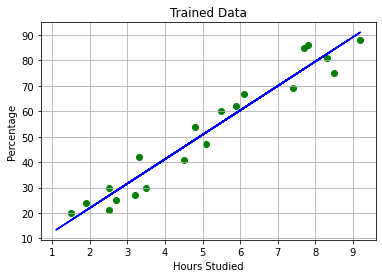

In [30]:
m=model.coef_
c=model.intercept_
line = m*X+c


#Plotting for training the data
plt.scatter(X_train,Y_train,color="green")
plt.plot(X,line,color="blue")
#df.plot(x='Hours',y='Scores',style='.',color ='red',markersize=18 )
plt.title("Trained Data")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage")
plt.grid()
plt.show()

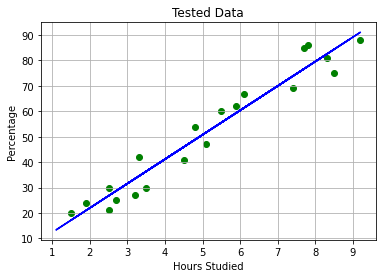

In [31]:
#Plotting for tested the data
plt.scatter(X_train,Y_train,color="green")
plt.plot(X,line,color="blue")
#df.plot(x='Hours',y='Scores',style='.',color ='red',markersize=18 )
plt.title("Tested Data")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage")
plt.grid()
plt.show()

**Making Prediction**

In [32]:
Y_predicted = model.predict(X_test)

In [46]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual score': [Y_test], 'Predicted score': [Y_predicted]})  
df

,Actual score,Predicted score
0,"[[95], [30], [76], [35], [17]]","[[88.21139357388518], [28.71845266505782], [69..."


In [47]:
# Testing with given data i.e for 9.25 hrs/day

hours = 9.25
given_data = model.predict([[hours]])
print("The predicted score if a person studies for",hours,"hours is",given_data)

The predicted score if a person studies for 9.25 hours is [[91.56986604]]


**Evaluating The Model**

In [48]:
from sklearn import metrics  
from sklearn.metrics import r2_score

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_predicted))
print('R2 Score:', r2_score(Y_test, Y_predicted))

Mean Absolute Error: 4.5916495300630285
R2 Score: 0.971014141329942
